PCA aplicado em rostos

In [1]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
rostos = {}
with zipfile.ZipFile("faces.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"): # se não for um rosto em arquivo .pgm
            continue 
        with facezip.open(filename) as image:
            # Salvo no vetor em preto em branco e decodificado em pixels
            rostos[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
            
rostos


{'s1/1.pgm': array([[48, 49, 45, ..., 56, 56, 54],
        [45, 52, 39, ..., 52, 50, 51],
        [45, 50, 42, ..., 48, 53, 50],
        ...,
        [50, 48, 50, ..., 45, 46, 46],
        [45, 54, 49, ..., 46, 47, 47],
        [51, 51, 51, ..., 47, 46, 46]], dtype=uint8),
 's1/10.pgm': array([[34, 34, 33, ...,  1,  1,  1],
        [35, 30, 32, ..., 38, 47, 39],
        [34, 28, 31, ..., 55, 59, 49],
        ...,
        [30, 29, 31, ..., 35, 37, 41],
        [31, 29, 32, ..., 42, 34, 39],
        [28, 33, 27, ..., 37, 40, 33]], dtype=uint8),
 's1/2.pgm': array([[ 60,  60,  62, ...,  40,  53,  46],
        [ 58,  73,  54, ...,  34,  50,  51],
        [ 68,  77,  80, ...,  36,  50,  49],
        ...,
        [ 24, 143, 160, ...,  34,  33,  33],
        [ 18, 136, 161, ...,  36,  36,  31],
        [  9, 111, 168, ...,  32,  34,  34]], dtype=uint8),
 's1/3.pgm': array([[39, 44, 53, ..., 47, 48, 47],
        [44, 44, 61, ..., 47, 45, 46],
        [59, 39, 57, ..., 46, 46, 44],
        ...,

Print de informações dos dados

In [3]:
dimensao = list(rostos.values())[0].shape
print("Dimensao das imagens:", dimensao)
 
classes = set(filename.split("/")[0] for filename in rostos.keys())
print("Numero de classes:", len(classes))
print("Numero de rostos:", len(rostos))

Dimensao das imagens: (112, 92)
Numero de classes: 40
Numero de rostos: 400


Aplico PCA nas imagens

16 primeiros rostos (matriz aplicado PCA)


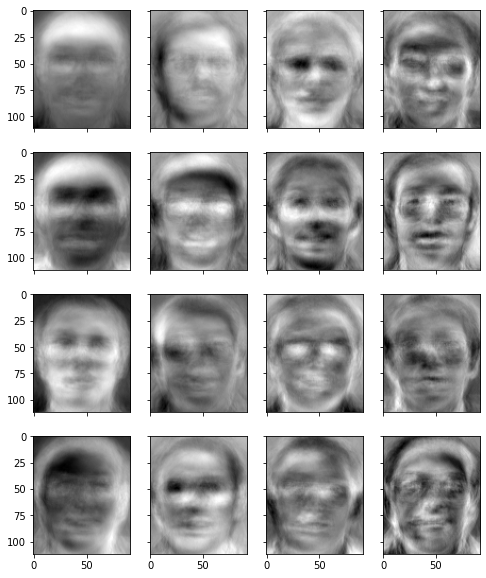

Formato da matriz de pesos: (50, 389)


In [5]:
# Uso todas classes de 1-39 para gerar eigenface 
# Usa toda classe 40 e img 10 da classe 39 para exemplo de pesquisa fora das classes definidas

matriz_rostos = []
matriz_label = []
for key,val in rostos.items():
    if key.startswith("s40/"):
        continue # vai testar essa classe
    if key == "s39/10.pgm":
        continue # usa esse imagem como exemplo fora da classe
    matriz_rostos.append(val.flatten())
    matriz_label.append(key.split("/")[0])
 
# matriz NxM = N imagens e M pixels por imagem
matriz_rostos = np.array(matriz_rostos)
 
# Aplico PCA
pca = PCA().fit(matriz_rostos)

# Utilizo 50 componentes 
n_componentes = 50
# vetor com as eigenfaces
eigenfaces = pca.components_[:n_componentes]
 
# Mostra as 16 primeiras
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(dimensao), cmap="gray")
print("16 primeiros rostos (matriz aplicado PCA)")
plt.show()
 
# Gera os pesos numa matriz KXN = K numero de eigenfaces e N numero de amostras
pesos = eigenfaces @ (matriz_rostos - pca.mean_).T
print("Formato da matriz de pesos:", pesos.shape)

Exemplo com rosto pertencente a uma das classes analisadas

Mais perto s39 distância  1559.997137


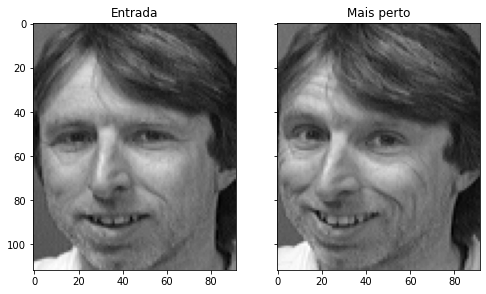

In [36]:
query = rostos["s39/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(pesos - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Mais perto %s distância  %f" % (matriz_label[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(dimensao), cmap="gray")
axes[0].set_title("Entrada")
axes[1].imshow(matriz_rostos[best_match].reshape(dimensao), cmap="gray")
axes[1].set_title("Mais perto")
plt.show()

Mais perto s5 distância  2690.209330


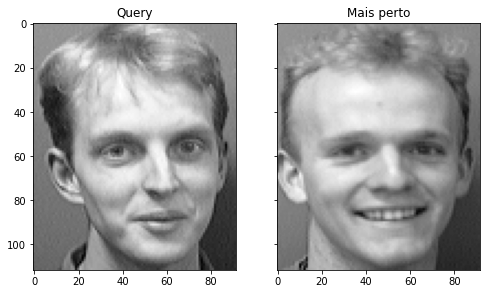

Mais perto s18 distância  2246.936914


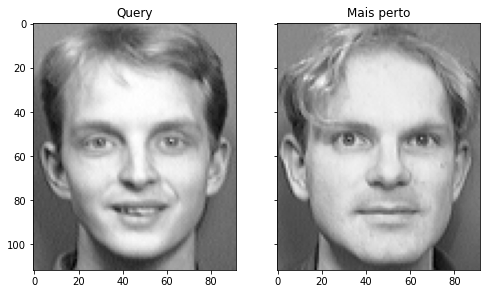

Mais perto s18 distância  2432.208610


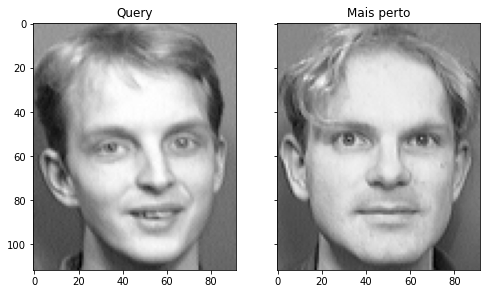

Mais perto s5 distância  1696.729005


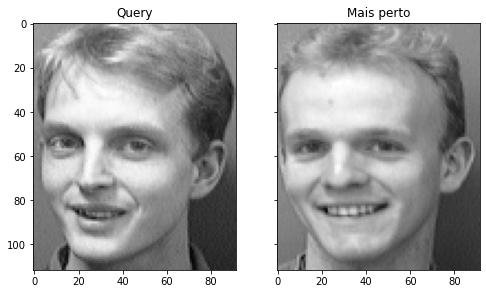

Mais perto s5 distância  1794.662483


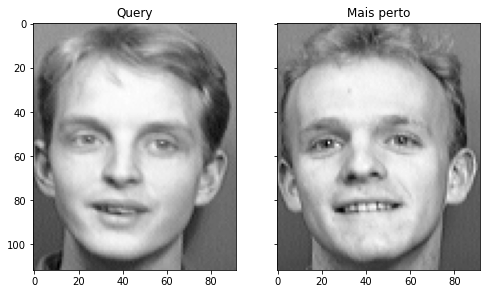

Mais perto s5 distância  2186.722351


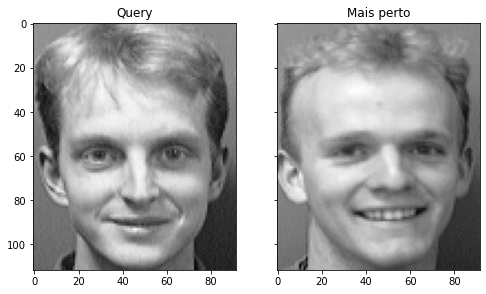

Mais perto s5 distância  2339.094178


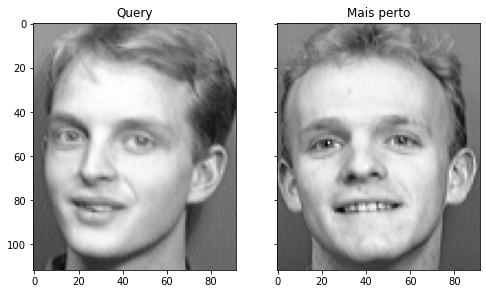

Mais perto s5 distância  2162.035605


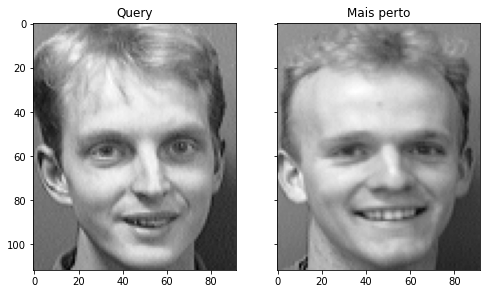

Mais perto s5 distância  2231.183357


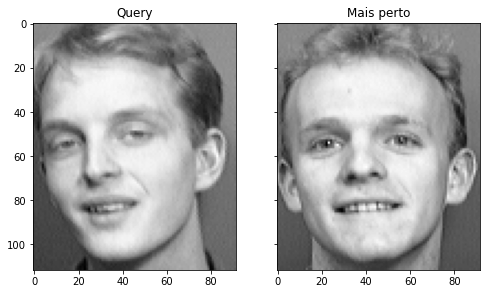

In [37]:
for i in range(1,10):
    query = rostos[f"s40/{i}.pgm"].reshape(1,-1)
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(pesos - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    print("Mais perto %s distância  %f" % (matriz_label[best_match], euclidean_distance[best_match]))
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(dimensao), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(matriz_rostos[best_match].reshape(dimensao), cmap="gray")
    axes[1].set_title("Mais perto")
    plt.show()